import all necessary libraries

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

lets extract the train and test data from excel file

In [2]:
train=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\train.xlsm")
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\test.xlsm")
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
train.shape

(159571, 8)

so train data contain 159571 rows and 8 columns

In [5]:
test.shape

(153164, 2)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


data contains 2 object type of columns and 6 int type of data

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153038 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


# Encoding of dataframe

lets we will encode our dataset

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
enc=OrdinalEncoder()

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [12]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
le=LabelEncoder()
label=le.fit_transform(train["comment_text"])
label
train=train.drop("comment_text",axis='columns')
train["comment_text"]=label


In [14]:
train

,id,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text
0,0000997932d777bf,0,0,0,0,0,0,74031
1,000103f0d9cfb60f,0,0,0,0,0,0,69080
2,000113f07ec002fd,0,0,0,0,0,0,81840
3,0001b41b1c6bb37e,0,0,0,0,0,0,35592
4,0001d958c54c6e35,0,0,0,0,0,0,157171
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,0,0,0,0,0,0,44139
159567,ffea4adeee384e90,0,0,0,0,0,0,156286
159568,ffee36eab5c267c9,0,0,0,0,0,0,129924
159569,fff125370e4aaaf3,0,0,0,0,0,0,59267


In [15]:
train.drop(['id'],axis=1,inplace=True)

In [16]:
train.isnull().sum()

malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
comment_text        0
dtype: int64

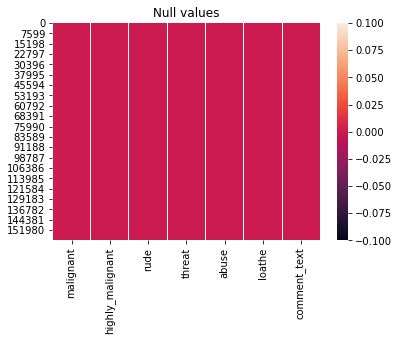

In [17]:
sns.heatmap(train.isnull())
plt.title("Null values")
plt.show()

train data does not have any null values

In [18]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,79688.965338
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,45990.152206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39864.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79705.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119491.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,159159.000000


it gives total count,mean,std,mini to max range of each column which is shown in above table

In [19]:
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.103724
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.039877
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.075431
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.021269
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.087155
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.034670
comment_text,0.103724,0.039877,0.075431,0.021269,0.087155,0.034670,1.000000


<AxesSubplot:>

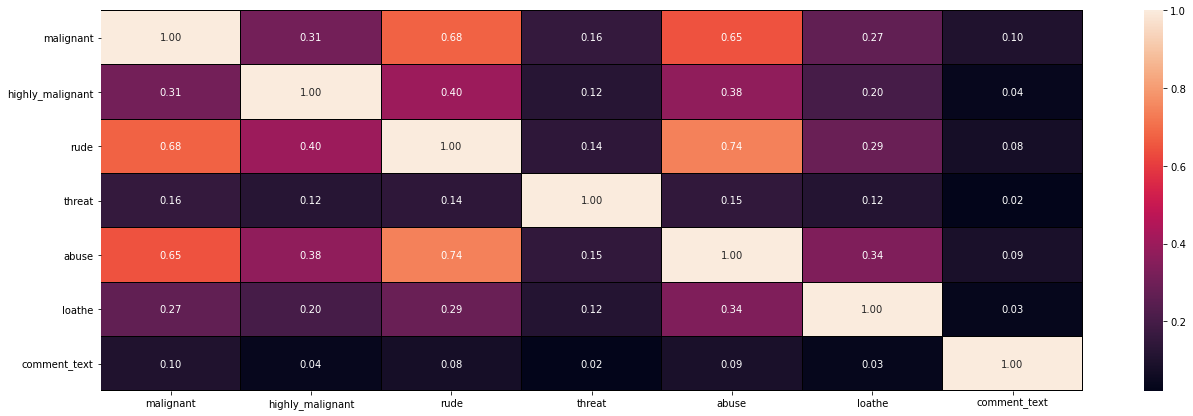

In [20]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(train.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

it shows the correlation of each column with its own and with another column it also gives the positive and negative correlation of each column

In [21]:
# checking the skewness for the features:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
comment_text        -0.000881
dtype: float64

malignant               AxesSubplot(0.125,0.71587;0.227941x0.16413)
highly_malignant     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
rude                 AxesSubplot(0.672059,0.71587;0.227941x0.16413)
threat                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
abuse               AxesSubplot(0.398529,0.518913;0.227941x0.16413)
loathe              AxesSubplot(0.672059,0.518913;0.227941x0.16413)
comment_text           AxesSubplot(0.125,0.321957;0.227941x0.16413)
dtype: object

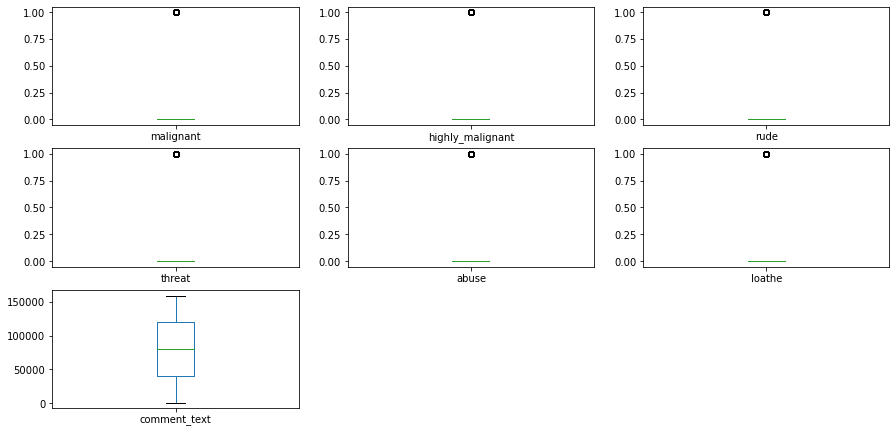

In [22]:
#plotting the boxplot of each column to check the outliers 
train.plot(kind='box',subplots = True,layout=(4,3),figsize = (15,10))

In [23]:
#calculate the zscore
z = np.abs(zscore(train))
print(z)

[[0.3255832  0.10048119 0.23644972 ... 0.22787476 0.09425005 0.12302597]
 [0.3255832  0.10048119 0.23644972 ... 0.22787476 0.09425005 0.23067979]
 [0.3255832  0.10048119 0.23644972 ... 0.22787476 0.09425005 0.04677178]
 ...
 [0.3255832  0.10048119 0.23644972 ... 0.22787476 0.09425005 1.09230324]
 [0.3255832  0.10048119 0.23644972 ... 0.22787476 0.09425005 0.44405222]
 [0.3255832  0.10048119 0.23644972 ... 0.22787476 0.09425005 1.05694622]]


In [24]:
threshold=3
print(np.where(z<3))
print(train.shape)

(array([     0,      0,      0, ..., 159570, 159570, 159570], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))
(159571, 7)


In [27]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
comment_text        -0.000881
dtype: float64

In [28]:
#remove skewness
train['malignant']=np.sqrt(train['malignant'])
train['highly_malignant']=np.sqrt(train['highly_malignant'])
train['rude']=np.sqrt(train['rude'])
train['threat']=np.sqrt(train['threat'])
train['abuse']=np.sqrt(train['abuse'])
train['loathe']=np.sqrt(train['loathe'])



In [29]:
train.shape

(159571, 7)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   malignant         159571 non-null  float64
 1   highly_malignant  159571 non-null  float64
 2   rude              159571 non-null  float64
 3   threat            159571 non-null  float64
 4   abuse             159571 non-null  float64
 5   loathe            159571 non-null  float64
 6   comment_text      159571 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 7.9 MB


malignant


0.0    144277
1.0     15294
Name: malignant, dtype: int64


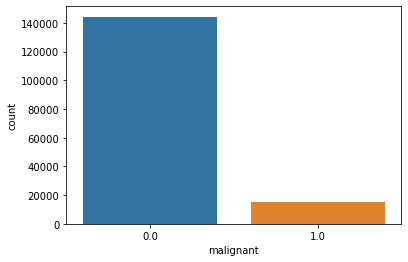

highly_malignant


0.0    157976
1.0      1595
Name: highly_malignant, dtype: int64


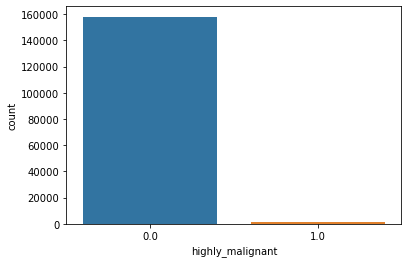

loathe


0.0    158166
1.0      1405
Name: loathe, dtype: int64


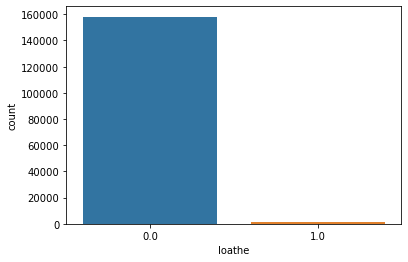

rude


0.0    151122
1.0      8449
Name: rude, dtype: int64


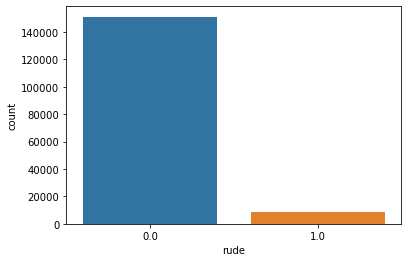

abuse


0.0    151694
1.0      7877
Name: abuse, dtype: int64


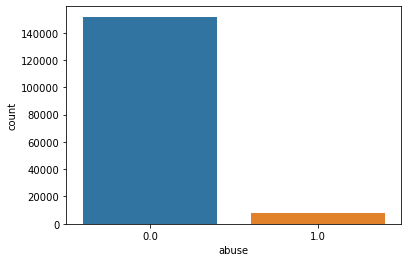

threat


0.0    159093
1.0       478
Name: threat, dtype: int64


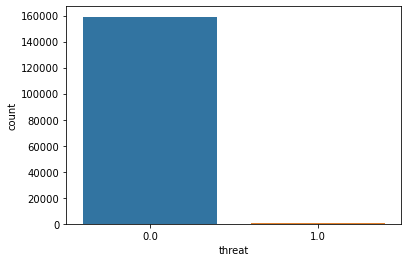

In [31]:
#detail insights of each column
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

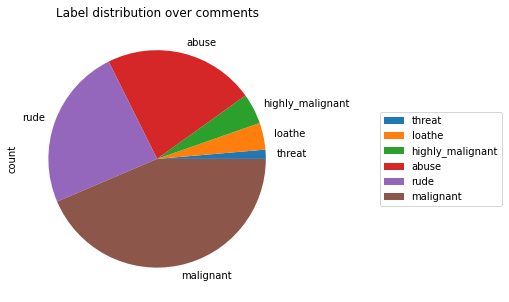

In [32]:
#Label distribution over comments
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [33]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0.0    143346
1.0      6360
3.0      4209
2.0      3480
4.0      1760
5.0       385
6.0        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


array([[<AxesSubplot:title={'center':'malignant'}>,
        <AxesSubplot:title={'center':'highly_malignant'}>],
       [<AxesSubplot:title={'center':'rude'}>,
        <AxesSubplot:title={'center':'threat'}>],
       [<AxesSubplot:title={'center':'abuse'}>,
        <AxesSubplot:title={'center':'loathe'}>],
       [<AxesSubplot:title={'center':'comment_text'}>,
        <AxesSubplot:title={'center':'bad'}>]], dtype=object)

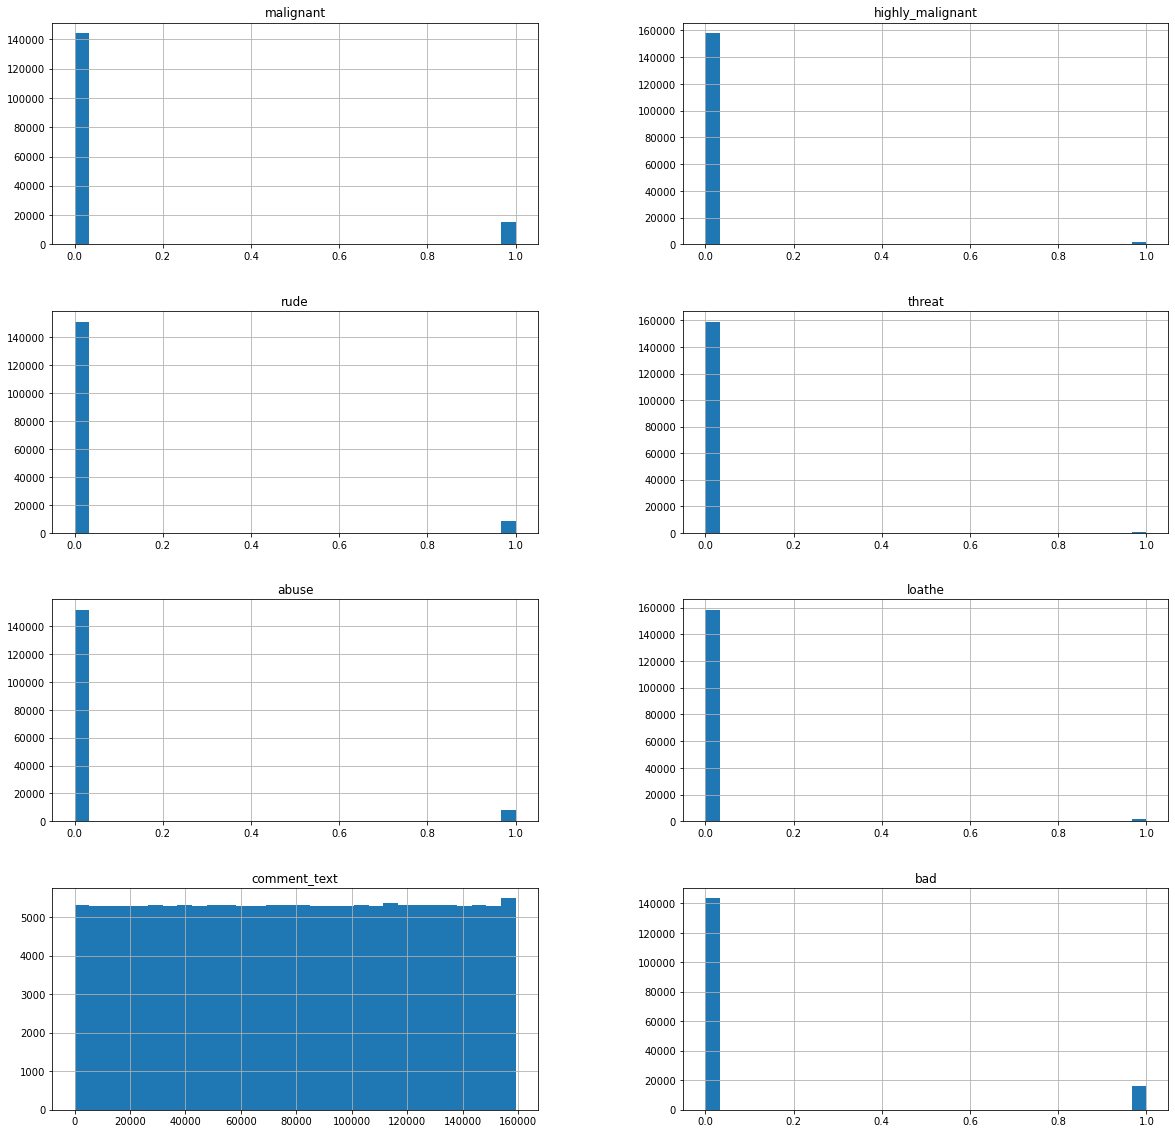

In [34]:
#plotting histogram for univariate analysis and checking the Normal Distribution
train.hist(figsize=(20,20), grid = True, layout = (4,2), bins = 30)

In [35]:
#assign the value of x and y for training and testing phase
x = train.drop(columns=['malignant'])
y = train[["malignant"]]
print(x.shape)
print(y.shape)

(159571, 7)
(159571, 1)


In [36]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [37]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(1,100):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.24)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  1 is 0.8937412823857371
R2 score correspond to random state  1 is 0.11048987250326259
R2 score correspond to random state  1 is 0.9437754922537797
R2 score correspond to random state  1 is 0.9437807328236903
R2 score correspond to random state  1 is 0.9483028722815415
R2 score correspond to random state  2 is 0.8935784537825258
R2 score correspond to random state  2 is 0.10982284724960845
R2 score correspond to random state  2 is 0.9392147835959335
R2 score correspond to random state  2 is 0.9387140136044054
R2 score correspond to random state  2 is 0.9446356967626988
R2 score correspond to random state  3 is 0.887702178752703
R2 score correspond to random state  3 is 0.12019705864869645
R2 score correspond to random state  3 is 0.9381843819730348
R2 score correspond to random state  3 is 0.9378268414840527
R2 score correspond to random state  3 is 0.9436528598040572
R2 score correspond to random state  4 is 0.8922194254112009
R2 score correspond to

In [52]:
gbr = GradientBoostingRegressor()
gbr.fit(train_x,train_y)
pred = gbr.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 94.12901148005865


Text(0, 0.5, 'predicted_malignant')

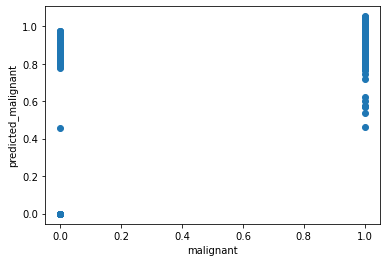

In [53]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('malignant')
plt.ylabel('predicted_malignant')

# saving model

In [54]:
import pickle

In [55]:
#saving model to the local file system
filename='malignant_comment_classifier.pickle'
pickle.dump(gbr,open(filename,'wb'))

In [56]:
filename

'malignant_comment_classifier.pickle'

# cross validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
for i in range(2,10):
    cv=cross_val_score(gbr,x,y,cv=i)
    print(gbr,cv.mean())


GradientBoostingRegressor() 0.9420471766662655
GradientBoostingRegressor() 0.9428206223948165
GradientBoostingRegressor() 0.9424446765968846
GradientBoostingRegressor() 0.9425840735830862
GradientBoostingRegressor() 0.9426183994283427
GradientBoostingRegressor() 0.9426492880953853
GradientBoostingRegressor() 0.9426805382721519
GradientBoostingRegressor() 0.9426630218819506


In [59]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-0.10048119, -0.23644972, -0.05481361, ..., -0.09425005,
        -0.12302597, -0.33643376],
       [-0.10048119, -0.23644972, -0.05481361, ..., -0.09425005,
        -0.23067979, -0.33643376],
       [-0.10048119, -0.23644972, -0.05481361, ..., -0.09425005,
         0.04677178, -0.33643376],
       ...,
       [-0.10048119, -0.23644972, -0.05481361, ..., -0.09425005,
         1.09230324, -0.33643376],
       [-0.10048119, -0.23644972, -0.05481361, ..., -0.09425005,
        -0.44405222, -0.33643376],
       [-0.10048119, -0.23644972, -0.05481361, ..., -0.09425005,
        -1.05694622, -0.33643376]])

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=70)

In [61]:
#lets plot and visualize
y_pred=dt.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [63]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,30))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [64]:
from sklearn.metrics import r2_score

In [65]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9444120333281292